## Linear Regularization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
dataset=pd.read_excel(r"C:\Users\Admin\Machine Learning\houseprice_2.xlsx")
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2


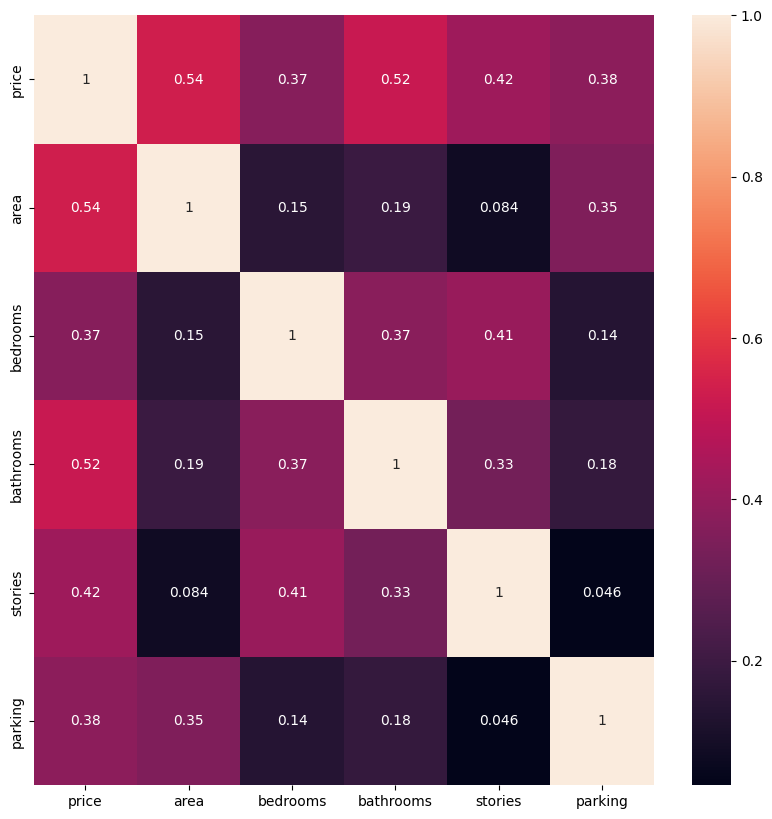

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [10]:
x=dataset.iloc[:,:-1]
y=dataset["price"]

In [11]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [15]:
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

100.0

In [28]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

3.58085121187873e-18
1.3841674962175002e-09
1.8923137192016364e-09


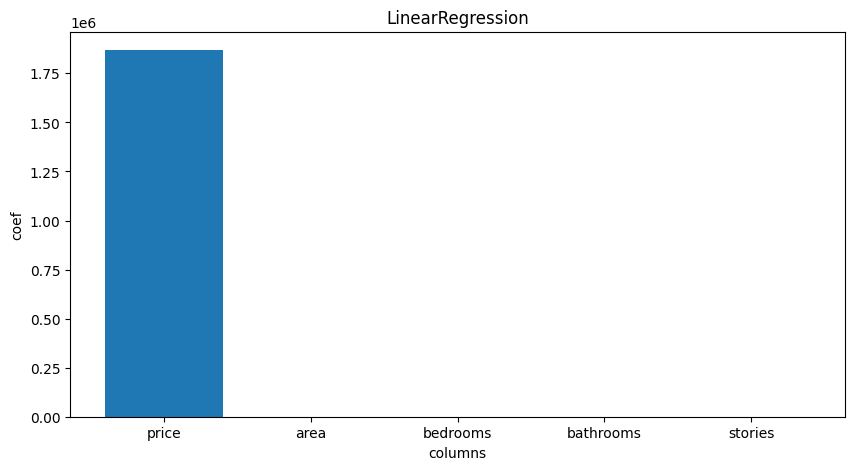

In [29]:
plt.figure(figsize=(10,5))
plt.bar(x.columns, lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

## Lasso

In [22]:
la=Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

99.99999999999065

In [30]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

0.47246811923782195
0.529886294404096
0.6873631640099882


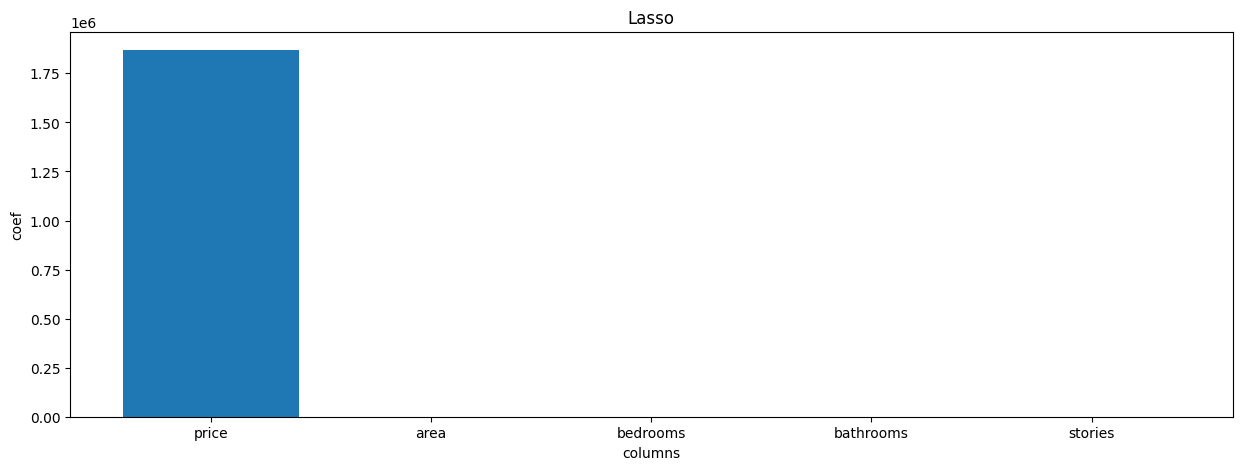

In [23]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

## Ridge

In [24]:
ri=Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

99.86579679755705

In [31]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

6783395140.343462
60826.86369970684
82361.36922334076


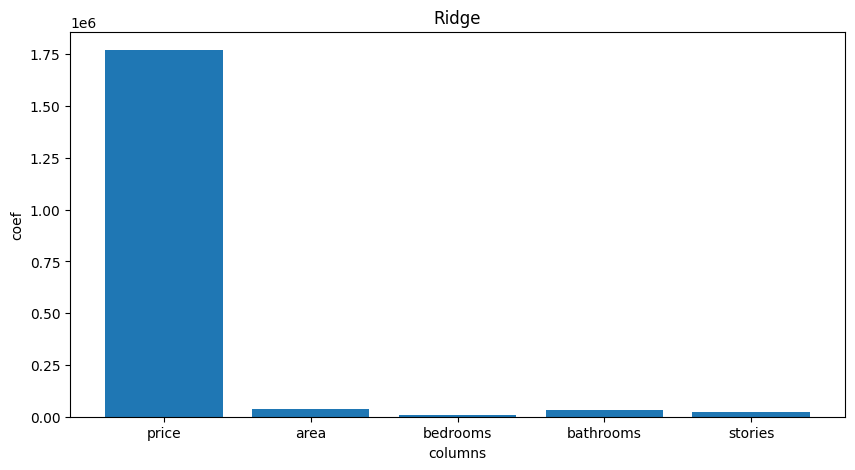

In [25]:
plt.figure(figsize=(10,5))
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [32]:
df=pd.DataFrame({"col_name":x.columns,"LinearRgression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [33]:
df

,col_name,LinearRgression,Lasso,Ridge
0,price,1.868723e+06,1.868722e+06,1.770790e+06
1,area,-1.423418e-10,0.000000e+00,3.888899e+04
2,bedrooms,-5.546441e-11,0.000000e+00,7.117796e+03
3,bathrooms,2.502750e-11,0.000000e+00,3.241587e+04
4,stories,2.131423e-10,0.000000e+00,2.158142e+04
